In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors
from tqdm import tqdm
%matplotlib inline

In [2]:
names = [
    "image_name", 
    "score", 
    "partial_faces", 
    "is_female", 
    "baby", 
    "child", 
    "teenager", 
    "youth", 
    "middle_age", 
    "senior", 
    "white", 
    "black", 
    "asian",
    "oval_face", 
    "round_face", 
    "heart_face", 
    "smiling", 
    "mouth_open", 
    "frowning", 
    "wearing_glasses", 
    "wearing_sunglasses", 
    "wearing_lipstick", 
    "tongue_out", 
    "duck_face", 
    "black_hair", 
    "blond_hair", 
    "brown_hair",
    "red_hair",
    "curly_hair",
    "straight_hair",
    "braid_hair",
    "showing_cellphone",
    "using_earphone",
    "using_mirror",
    "braces",
    "wearing_hat",
    "harsh_lighting",
    "dim_lighting"
]
types = [
    str,
    np.float16
] + [np.int8]*36
dtypes = dict(zip(names,types))
df = pd.read_csv("data/selfie_dataset.txt", sep=" ", header=None, names=names, dtype=dtypes)

In [3]:
df.head()

,image_name,score,partial_faces,is_female,baby,child,teenager,youth,middle_age,senior,...,curly_hair,straight_hair,braid_hair,showing_cellphone,using_earphone,using_mirror,braces,wearing_hat,harsh_lighting,dim_lighting
0,00a454da495e11e28a7322000a1fa414_6,3.900391,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,00cddb96ac4c11e3a30212279ba1b65f_6,4.386719,1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,01cdd7aa1a1a11e2aaa822000a1fb0dd_6,4.242188,-1,1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,024696bead0c11e389d50ec42b3b1b1c_6,4.167969,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,026df048221a11e2b52122000a1fa4b5_6,3.873047,-1,1,-1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [4]:
df.values.shape

(46836, 38)

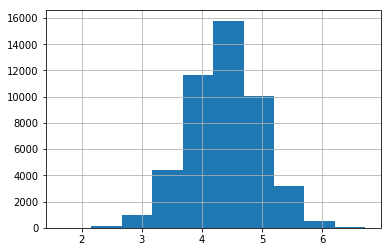

In [5]:
df.score.hist()

In [22]:
listNames = df.image_name
listNames.shape

(46836,)

0


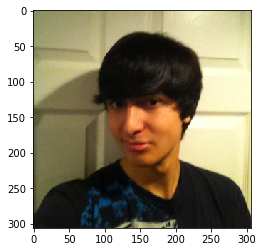

In [7]:
for i,img in enumerate(listNames):
    plt.imshow(mpimg.imread("data/images/"+img+".jpg"))
    print(i)
    plt.show()
    break

In [8]:
image = mpimg.imread("data/images/"+img+".jpg")
image.shape

(306, 306, 3)

In [9]:
def isColor(image, divs):
    hueSet=set()
    diff = np.uint64(0)
    w = image.shape[0]
    h = image.shape[1]
    
    xdiv = w // (divs+1)
        
    for i in range(divs):
        x = i * xdiv + xdiv
        hsvCol=matplotlib.colors.rgb_to_hsv(image[x,:,:])
        for pixel in hsvCol:
            diff+=pixel[1]
            hueSet.add(pixel[0])
    
    ydiv = h // (divs+1)
    
    for i in range(divs):
        y = i * ydiv + ydiv
        hsvRow=matplotlib.colors.rgb_to_hsv(image[:,y,:])
        for pixel in hsvRow:
            diff+=pixel[1]
            hueSet.add(pixel[0])
    
    diff/=(w*divs+h*divs)
    #print(f"different hue nb: {len(hueSet)}")
    #print(f"hueMax: {max(hueSet)}")
    #print(f"hueMin: {min(hueSet)}")
    return diff > 0.1

In [10]:
def showHue(img):
    hsvImg=matplotlib.colors.rgb_to_hsv(img)
    plt.imshow(hsvImg[:,:,0], cmap='gray')
    plt.show()

In [23]:
coloredImageFileNames=[]
for i,imgFileName in tqdm(enumerate(listNames)):
    img = mpimg.imread("data/images/"+imgFileName+".jpg")
    isColored=isColor(img, 2)
    #print(i,isColored)
    if isColored:
        coloredImageFileNames.append(imgFileName)
    #print(img.shape)
    #plt.imshow(img)
    #plt.show()
    #showHue(img)
#print(coloredImageFileNames)
with open("coloredImages.txt","w+") as f:
    for imageFileName in coloredImageFileNames:
        f.write(f"{imageFileName}\n")

46836it [03:59, 195.60it/s]


In [12]:
def deltaRGB(image):
    rg = np.abs(np.int16(image[:,:,0]) - np.int16(image[:,:,1]))
    gb = np.abs(np.int16(image[:,:,1]) - np.int16(image[:,:,2]))
    rb = np.abs(np.int16(image[:,:,0]) - np.int16(image[:,:,2]))
    
    print("red - green")
    plt.imshow(rg, cmap='gray')
    plt.show()
    print("green - blue")
    plt.imshow(gb, cmap='gray')
    plt.show()
    print("red - blue")
    plt.imshow(rb, cmap='gray')
    plt.show()
    print("real image")
    plt.imshow(image)
    plt.show()

red - green


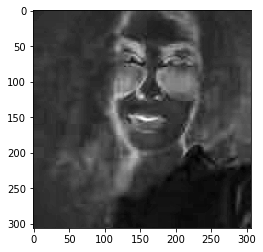

green - blue


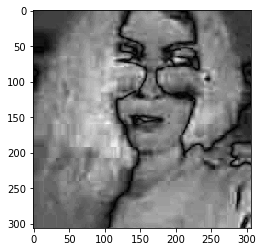

red - blue


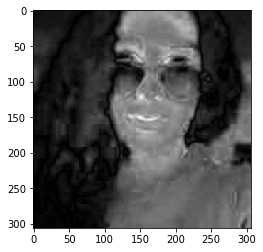

real image


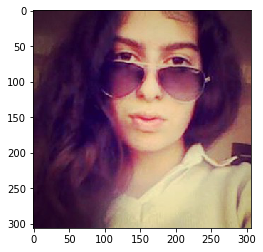

In [13]:
deltaRGB(mpimg.imread("data/images/"+list(listNames)[35]+".jpg"))

red - green


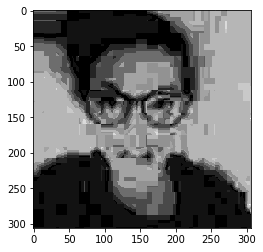

green - blue


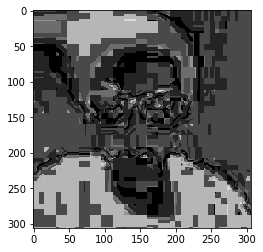

red - blue


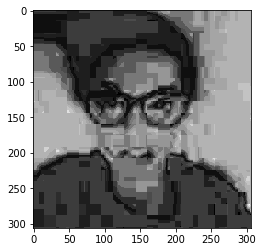

real image


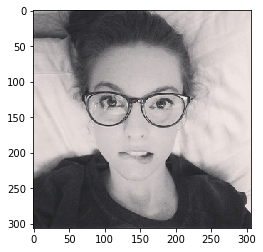

In [14]:
deltaRGB(mpimg.imread("data/images/"+list(listNames)[17]+".jpg"))

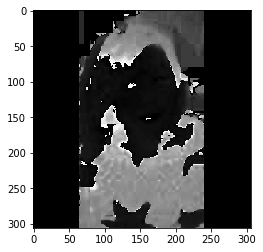

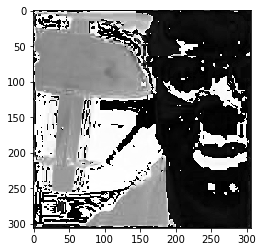

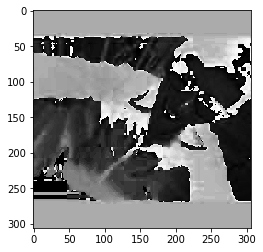

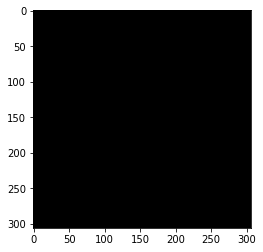

In [15]:
showHue(mpimg.imread("data/images/"+list(listNames)[9]+".jpg"))
showHue(mpimg.imread("data/images/"+list(listNames)[10]+".jpg"))
showHue(mpimg.imread("data/images/"+list(listNames)[48]+".jpg"))
showHue(mpimg.imread("data/images/"+list(listNames)[49]+".jpg"))

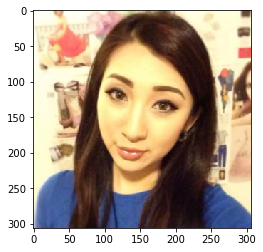

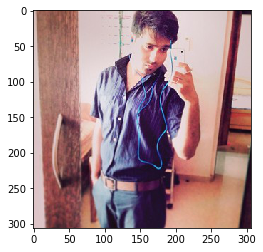

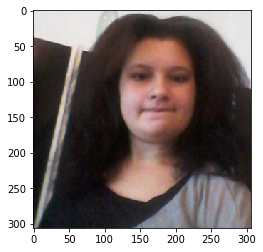

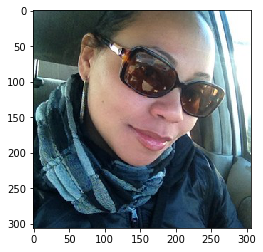

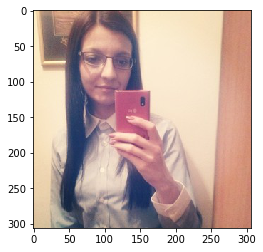

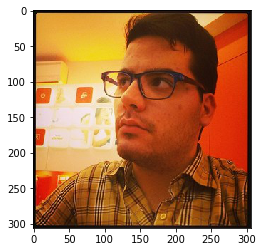

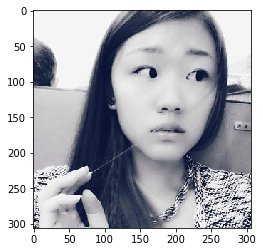

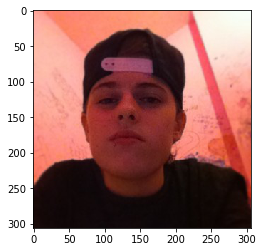

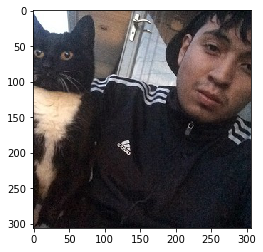

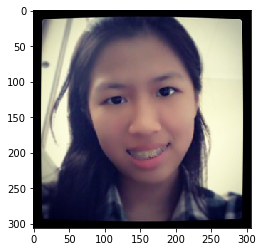

In [31]:
import random
with open("coloredImages.txt","r") as f:
    content = f.readlines()
content = [x.strip() for x in content] 
random.shuffle(content)
for imageFileName in content[:10]:
    img = mpimg.imread("data/images/"+imageFileName+".jpg")
    plt.imshow(img)
    plt.show()